# importing libraries  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
from ipykernel import kernelapp as app
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

#  Data Importing

In [2]:
#loading the csv
df=pd.read_csv("yield.csv",encoding = "ISO-8859-1")
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

# Data preparation and encoding

In [3]:
#indian agricultural production dataset
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [4]:
#converting production to numeric type
df['Production']=pd.to_numeric(df['Production'],errors='coerce')

In [5]:
#grouping area and production for each year by mean
data=df.groupby(['Crop_Year'])['Area','Production'].mean()
data=data.reset_index(level=0, inplace=False)
data

C:\Users\thineti pavan kumar\.conda\envs\project\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Crop_Year,Area,Production
0,1997,26038.324081,60.640016
1,1998,14479.153906,110.244776
2,1999,12678.074790,51.938993
3,2000,12102.612169,6902.034888
4,2001,12371.499489,7003.922685
5,2002,9463.680476,5940.707826
6,2003,9954.769395,5758.853773
7,2004,11891.933465,6704.476421
8,2005,11822.333236,5986.123889
9,2006,11913.672644,6684.864189


In [6]:
#calulation cpi(  )

data['CPI']=data['Production']/data['Area']
data.head()

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,60.640016,0.002329
1,1998,14479.153906,110.244776,0.007614
2,1999,12678.074790,51.938993,0.004097
3,2000,12102.612169,6902.034888,0.570293
4,2001,12371.499489,7003.922685,0.566134


# discriptive analysis

In [7]:
data.describe()

,Crop_Year,Area,Production,CPI
count,19.000000,19.000000,19.000000,19.000000
mean,2006.000000,12141.402985,2739.321658,0.238643
std,5.627314,3633.397954,3280.866927,0.285902
min,1997.000000,8187.362989,0.500000,0.000042
25%,2001.500000,10531.577629,0.500000,0.000048
50%,2006.000000,11768.527148,80.976112,0.007614
75%,2010.500000,12237.055829,6335.494039,0.562446
max,2015.000000,26038.324081,7003.922685,0.627738


# Box plots

<AxesSubplot:xlabel='CPI'>

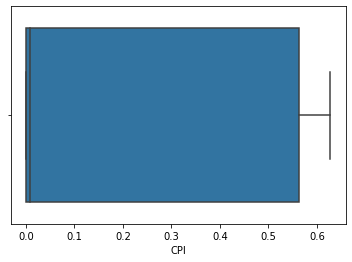

In [8]:
#boxplot plotting
import seaborn as sns
sns.boxplot(x=data['CPI'])

In [9]:
data = data[np.isfinite(data['CPI'])]
data=data[data.CPI <0.6]
data=data[data.CPI >0]
data.set_index('Crop_Year')
data

,Crop_Year,Area,Production,CPI
0,1997,26038.324081,60.640016,0.002329
1,1998,14479.153906,110.244776,0.007614
2,1999,12678.074790,51.938993,0.004097
3,2000,12102.612169,6902.034888,0.570293
4,2001,12371.499489,7003.922685,0.566134
6,2003,9954.769395,5758.853773,0.578502
7,2004,11891.933465,6704.476421,0.563784
8,2005,11822.333236,5986.123889,0.506340
9,2006,11913.672644,6684.864189,0.561109
10,2007,10513.848637,80.976112,0.007702


# plotting histogram

array([[<AxesSubplot:title={'center':'Crop_Year'}>,
        <AxesSubplot:title={'center':'Area'}>],
       [<AxesSubplot:title={'center':'Production'}>,
        <AxesSubplot:title={'center':'CPI'}>]], dtype=object)

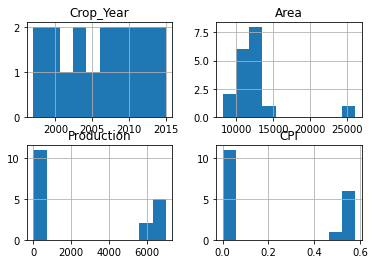

In [10]:
#plotting histogram
data.hist()

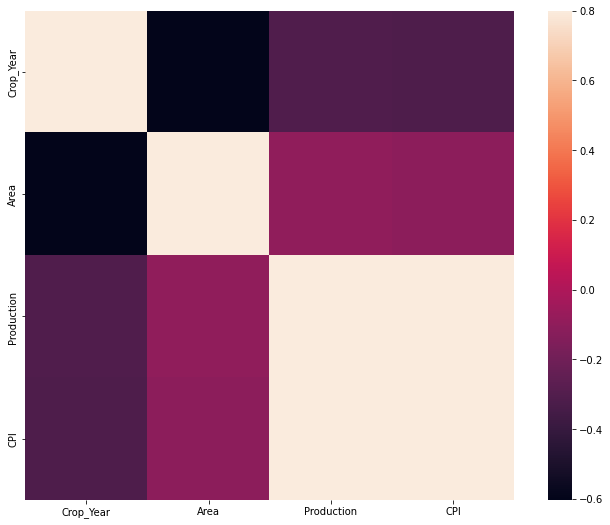

In [11]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Scatter plots 

C:\Users\thineti pavan kumar\.conda\envs\project\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


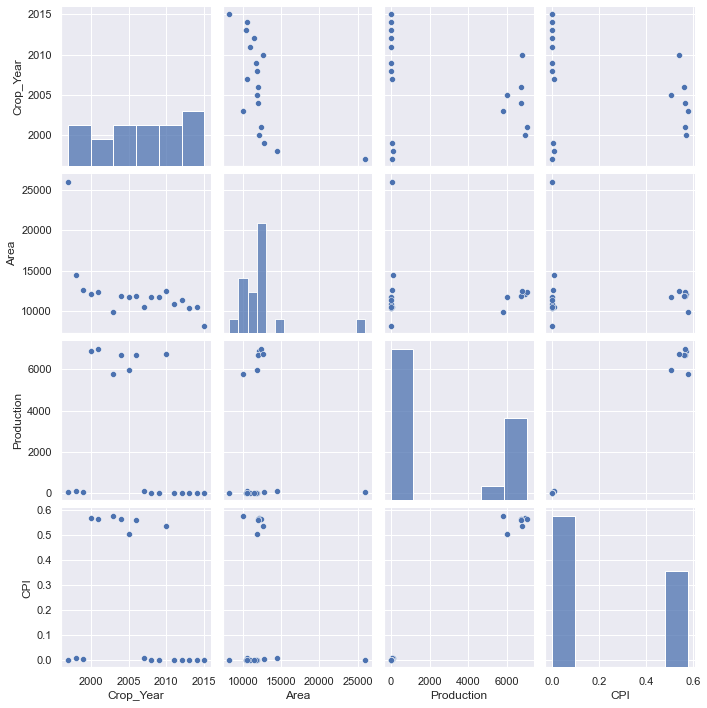

In [12]:
#scatterplot
sns.set()
cols = ['Crop_Year', 'Area', 'Production', 'CPI']
sns.pairplot(data[cols], size = 2.5)
plt.show();

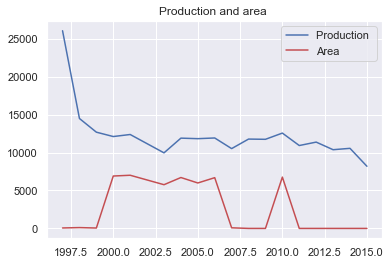

In [13]:
#comparison of production and area for each year
x_axis=data.Crop_Year
y_axis=data.Area

y1_axis=data.Production

plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')

plt.title("Production and area ")
plt.legend(["Production ","Area"])
plt.show()

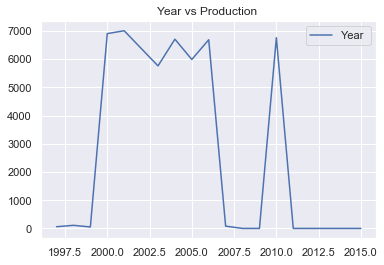

In [14]:
#plotting of production
x_axis=data.Crop_Year
y1_axis=data.Production



plt.plot(x_axis,y1_axis)

plt.title("Year vs Production ")
plt.legend(["Year ","Production"])
plt.show()

# Applying random forest

In [15]:
#importing random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# from sklearn.cross_validation import train_test_split

In [16]:
#splitting and fitting of the model
x=data.iloc[:,0:1].values
y=data.iloc[:,3].values
regressor=RandomForestRegressor(n_estimators=12,random_state=0,n_jobs=1,verbose=13)

regressor.fit(x,y)

building tree 1 of 12
building tree 2 of 12
building tree 3 of 12
building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12
building tree 9 of 12
building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

RandomForestRegressor(n_estimators=12, n_jobs=1, random_state=0, verbose=13)

In [17]:
#predicting for the test values
y_pred=regressor.predict(x)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([5.01934701e-02, 5.28360495e-02, 5.15193813e-02, 3.80867696e-01,
       5.20337106e-01, 5.65716826e-01, 5.54524726e-01, 4.75587515e-01,
       4.46054022e-01, 5.38190816e-02, 2.59560831e-03, 4.48920581e-02,
       3.13989619e-01, 1.34593073e-01, 4.52905295e-05, 4.69600765e-05,
       4.88119991e-05, 5.65809967e-05])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

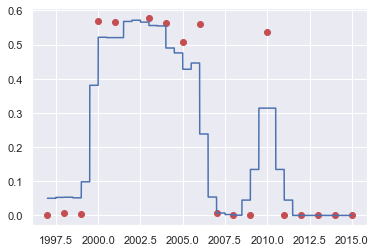

In [18]:
#random forest steps plotting
x_grid=np.arange(min(x),max(x),0.001)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y,color='r')
plt.plot(x_grid,regressor.predict(x_grid),color='b')
a=plt.show()
a


#  DENSITY PLOTS

C:\Users\thineti pavan kumar\.conda\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPI', ylabel='Density'>

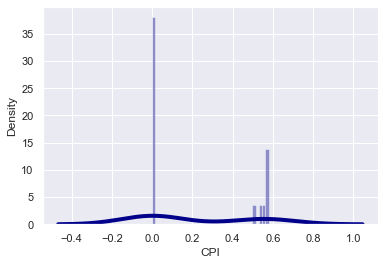

In [19]:
sns.distplot(data['CPI'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue',
             kde_kws={'linewidth': 4})

C:\Users\thineti pavan kumar\.conda\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area', ylabel='Density'>

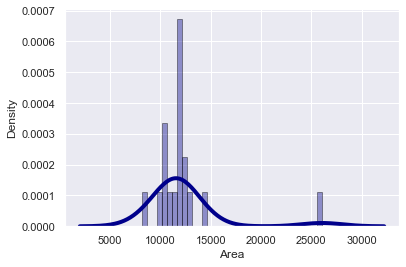

In [20]:
sns.distplot(data['Area'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\thineti pavan kumar\.conda\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Production', ylabel='Density'>

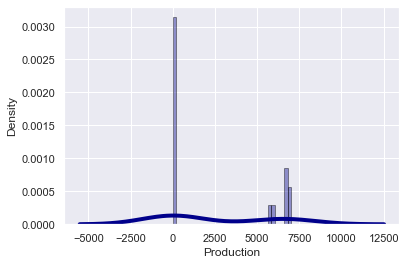

In [21]:
sns.distplot(data['Production'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})





C:\Users\thineti pavan kumar\.conda\envs\project\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Crop_Year', ylabel='Density'>

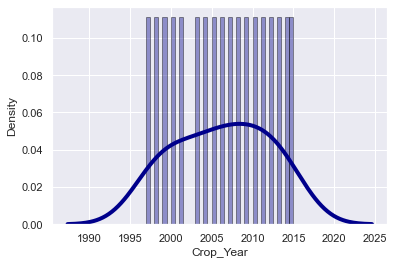

In [22]:
sns.distplot(data['Crop_Year'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# regression model

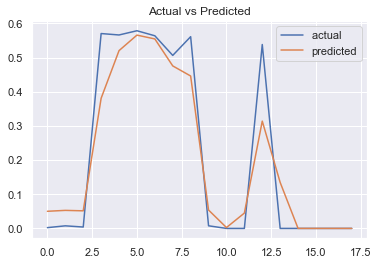

In [23]:
#actual and predicted values
dm = pd.DataFrame({'Actual': y, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
b=plt.show()
b